# Mfundo Monchwe
## 201726904
## Title: Coronavirus Lung Image Classification with Uncertainty Estimation Using Bayesian Convolutional Neural Networks (BCNNS)

### This Code implementation involves the creation of Standard CNN and Bayesian CNN model

##### Below we import necessary libraries

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import splitfolders

tfd = tfp.distributions
tfpl = tfp.layers


#### using the splitfolder library to split the dataset  into ratio of 80% train and 20% validation set

In [ ]:
input_dir = os.path.join('C:/Users/Mfund/Downloads/COVID-radiography/COVID-19_Radiography_Dataset/')
output_dir = os.path.join('C:/Users/Mfund/Downloads/COVID-radiography/COVID-19_Radiography_Dataset_splitted/')
splitfolders.ratio(input_dir, output = output_dir, seed=1220, ratio=(0.8,0.2), group_prefix=None)

#### split into train directory and test directory

In [39]:
train_dir = os.path.join('C:/Users/Mfund/Downloads/COVID-radiography/COVID-19_Radiography_Dataset_splitted/train/')
test_dir = os.path.join('C:/Users/Mfund/Downloads/COVID-radiography/COVID-19_Radiography_Dataset_splitted/val/')


#####  from tensorflow keras preprocessing image import imageDataGenerator to rescale images, set the batch size and so on  by creating the function to do for each train and test data

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_par_dir, test_par_dir):
    train_datagen = ImageDataGenerator(rescale= 1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator= train_datagen.flow_from_directory(train_par_dir,
                                                     target_size = (75,75),
                                                     batch_size = 256,
                                                     class_mode = 'categorical',
                                                     subset = 'training')
    test_generator = test_datagen.flow_from_directory(test_par_dir,
                                                     target_size = (75,75),
                                                     batch_size = 256,
                                                     class_mode = 'categorical')
    
    return train_generator, test_generator


##### * below is the output and the discovery made is that it found 16930 images belonging to 4 classes from train generator.
##### * for test generator it found 4235 images belonging to 4 classes 

In [5]:
train_generator,test_generator = image_generator(train_dir,test_dir)

Found 16930 images belonging to 4 classes.
Found 4235 images belonging to 4 classes.


###### Here the Standard CNN model is built with 4 layers with dense as as the layer with activation using softmax

In [6]:

from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation ='relu'),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation= 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation ='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(units=4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 8)         6152      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2336      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

##### Given above output it is started with 6152 ended with 2052, another observation can be made is the total parameters of 197,548

Below is the implementation code for compiling the model using adam as the optimizer and loss function is categorical crossentropy since this research deals with classification problem and of course the metrics is accuracy

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

below is the implementation  to fit the model with 100 epochs and step of 10 per epoch

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=100,
    verbose =1)

Epoch 1/100
10/10 [==============================] - 17s 2s/step - loss: 1.2536 - accuracy: 0.4457
Epoch 2/100
10/10 [==============================] - 15s 1s/step - loss: 1.1395 - accuracy: 0.4844
Epoch 3/100
10/10 [==============================] - 14s 1s/step - loss: 1.0276 - accuracy: 0.5949
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 0.9856 - accuracy: 0.6098
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 0.9290 - accuracy: 0.6289
Epoch 6/100
10/10 [==============================] - 12s 1s/step - loss: 0.9392 - accuracy: 0.6117
Epoch 7/100
10/10 [==============================] - 11s 1s/step - loss: 0.8729 - accuracy: 0.6543
Epoch 8/100
10/10 [==============================] - 11s 1s/step - loss: 0.8151 - accuracy: 0.6668
Epoch 9/100
10/10 [==============================] - 11s 1s/step - loss: 0.8145 - accuracy: 0.6695
Epoch 10/100
10/10 [==============================] - 10s 977ms/step - loss: 0.8212 - accuracy: 0.6609
Epoch 

Observing the output this research observes that there was no struggle of fitting the model and the accuracy escalated quickly and the final accuracy is 85.62%

prediction fuction is defined with two parameters ( imagedata and label) this function will be used to prediction whether is coronavirus or lung_opacity,normal, viral-pneumonia

In [69]:
def import_and_predict(image_data, label):
    
    img = cv2.imread(image_data)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    plt.imshow(img)
    plt.axis('off')
    
    img_resize = (cv2.resize(img, dsize =(75,75), interpolation=cv2.INTER_CUBIC))/255.
    
    img_reshape = img_resize[np.newaxis,...]
    
    prediction = model.predict(img_reshape)
    print(prediction)
    
    label_prediction = label[np.argmax(prediction)]
    
    return label_prediction

this variable takes into account of tracking test-dir

In [88]:

label = os.listdir(test_dir)

first this read image of covid from the directory

[[0.95666546 0.01134403 0.02780131 0.00418921]]


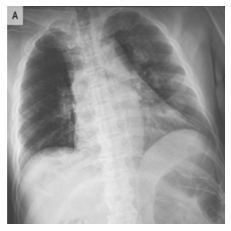

In [91]:
image3_dir = os.path.join(test_dir+'COVID/COVID-2.png')
prediction_1 =import_and_predict(image3_dir, label)

In [92]:
prediction_1

'COVID'

###### and the standard cnn model predicts coronavirus with probability of 0.9566, the model is certain that it predicted is COVID , but it does not show any certainty.

[[2.8355339e-01 2.8128487e-01 4.3512428e-01 3.7417445e-05]]


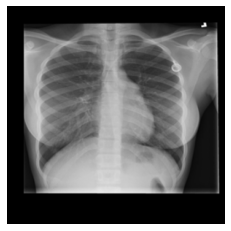

In [82]:
image4_dir = os.path.join(test_dir+'Normal/Normal-1.png')
prediction_2 = import_and_predict(image4_dir, label)

In [83]:
prediction_2

'Normal'

#### Unfortunately it predicted Normal with probability of .435 which alread raise an issue simply because it doesnt show any certainty and causes a problem, since theres no assurance it is normal yet it predicted Normal

[[4.3873955e-02 9.5174545e-01 4.2232121e-03 1.5732805e-04]]


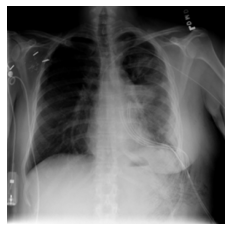

In [84]:
image5_dir = os.path.join(test_dir +'Lung_Opacity/Lung_Opacity-1.png')
prediction_3 = import_and_predict(image5_dir,label)

In [85]:
prediction_3

'Lung_Opacity'

#### The standard CNN model predicts the image is lung opacity with  high probability of 0.9517, which is very good, the model is confident that this image belongs in  Lung_opacity class

[[5.9221038e-06 1.0599486e-04 3.8753327e-03 9.9601269e-01]]


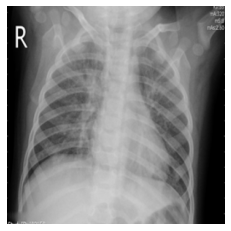

In [86]:
image6_dir = os.path.join(test_dir +'Viral Pneumonia/Viral Pneumonia-1.png')
prediction_4 = import_and_predict(image6_dir,label)

In [87]:
prediction_4

'Viral Pneumonia'

##### The Standard CNN model once again predicts with high probability of 0,996 that this image belongs to Viral Pneumonia class , the model once again is very confident that it is certain

### Buidling Bayesian CNN Model
#### * KL divergence
##### * measures how close q and p distributions and it always divded by the train size
#### * First layer is Convolutional2DReparamaterization
##### * takes aleatoric uncertainty into account
#### * Use of multivariate normal fn since this research deal with more than 2 outcomes
#### * Kernel prior and bias fn -  makes own observation before looking at the data
#### * kernel posteror and bias fn -  after looking at data
#### * same procedure as building the Standard CNN architecture the only difference is the first layer and last layer
#### * Last layer DenseReparameterization
##### * takes  epistemic uncertainty into account
##### * Uses OneHotCategorical.params_size(4) since we dealing 4 classes

In [11]:
divergence_fn = lambda q,p,_:tfd.kl_divergence(q,p)/16930

model_bayes = Sequential([

    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = divergence_fn,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = divergence_fn),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(4), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = divergence_fn,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = divergence_fn
                                ),
    tfpl.OneHotCategorical(4)
    
])
model_bayes.summary()

C:\Users\Mfund\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_reparameterization (C (None, 60, 60, 8)         12304     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        2336      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)         

##### Observation  made is at the iniital point it was 12304 at the end is 4104, with total parameters of 205,752.
 #### comparison is already in the report in chapter 4

In [14]:
from tensorflow.keras.optimizers import Adam

def negative_log_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model_bayes.compile(loss = negative_log_likelihood,
              optimizer = Adam(learning_rate=1.0e-5),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

#### define a function Negative log likelihood(NLL) which takes tw arguements (y_true, y_pred) the model is compiled using the negative log likelihood with adam learning rate of 1.0e-5 and metrics is accuracy

### below is the implementation of bayes model and it is done for 400 times simply because this model is way complicated than the standard CNN model.
### When running this cell the probability is  0.98 that the pc will die, simply because of the power.

In [15]:
history_bayes = model_bayes.fit(
      train_generator,
      epochs=400,
      verbose=1)

Epoch 1/400
67/67 [==============================] - 60s 874ms/step - loss: 2.7366 - accuracy: 0.2519
Epoch 2/400
67/67 [==============================] - 59s 878ms/step - loss: 2.5113 - accuracy: 0.3092
Epoch 3/400
67/67 [==============================] - 60s 883ms/step - loss: 2.4606 - accuracy: 0.3359
Epoch 4/400
67/67 [==============================] - 60s 888ms/step - loss: 2.4386 - accuracy: 0.3478
Epoch 5/400
67/67 [==============================] - 60s 888ms/step - loss: 2.4158 - accuracy: 0.3571
Epoch 6/400
67/67 [==============================] - 60s 887ms/step - loss: 2.4158 - accuracy: 0.3612
Epoch 7/400
67/67 [==============================] - 61s 905ms/step - loss: 2.3933 - accuracy: 0.3572
Epoch 8/400
67/67 [==============================] - 61s 904ms/step - loss: 2.3810 - accuracy: 0.3705
Epoch 9/400
67/67 [==============================] - 62s 913ms/step - loss: 2.3765 - accuracy: 0.3784
Epoch 10/400
67/67 [==============================] - 62s 924ms/step - loss: 2.364

67/67 [==============================] - 65s 970ms/step - loss: 1.8343 - accuracy: 0.6402
Epoch 160/400
67/67 [==============================] - 65s 968ms/step - loss: 1.8350 - accuracy: 0.6420
Epoch 161/400
67/67 [==============================] - 65s 970ms/step - loss: 1.8279 - accuracy: 0.6481
Epoch 162/400
67/67 [==============================] - 65s 961ms/step - loss: 1.8286 - accuracy: 0.6419
Epoch 163/400
67/67 [==============================] - 65s 963ms/step - loss: 1.8265 - accuracy: 0.6370
Epoch 164/400
67/67 [==============================] - 65s 958ms/step - loss: 1.8240 - accuracy: 0.6435
Epoch 165/400
67/67 [==============================] - 65s 962ms/step - loss: 1.8231 - accuracy: 0.6452
Epoch 166/400
67/67 [==============================] - 65s 961ms/step - loss: 1.8226 - accuracy: 0.6491
Epoch 167/400
67/67 [==============================] - 65s 962ms/step - loss: 1.8235 - accuracy: 0.6552
Epoch 168/400
67/67 [==============================] - 65s 962ms/step - loss: 

67/67 [==============================] - 64s 954ms/step - loss: 1.6891 - accuracy: 0.7132
Epoch 318/400
67/67 [==============================] - 65s 966ms/step - loss: 1.6873 - accuracy: 0.7065
Epoch 319/400
67/67 [==============================] - 65s 969ms/step - loss: 1.6879 - accuracy: 0.7109
Epoch 320/400
67/67 [==============================] - 65s 967ms/step - loss: 1.6842 - accuracy: 0.7158
Epoch 321/400
67/67 [==============================] - 64s 951ms/step - loss: 1.6818 - accuracy: 0.7149
Epoch 322/400
67/67 [==============================] - 64s 945ms/step - loss: 1.6819 - accuracy: 0.7146
Epoch 323/400
67/67 [==============================] - 67s 994ms/step - loss: 1.6825 - accuracy: 0.7157
Epoch 324/400
67/67 [==============================] - 65s 969ms/step - loss: 1.6841 - accuracy: 0.7096
Epoch 325/400
67/67 [==============================] - 64s 953ms/step - loss: 1.6809 - accuracy: 0.7138
Epoch 326/400
67/67 [==============================] - 63s 942ms/step - loss: 

#### This research made observation that this model struggled to raise its accuracy and if you were to observe carefully at the iterations it has been stuck for 60s from epoch 104 to epoch 294 or so... thats how complex the model is.

In [16]:
model.save('bayes_final.h5')

In [ ]:
model.save('model_bayes.h5')

##### below is the implementation code of a function that takes two arguments (image and true label) and also this function instead of doing predictions once it will predict for each class 400 times, the true label is to green and also the percentile is between 2.5 and 97.55 credit interval and our labels are [COVID,Luug-Opacity,Normal,Viral Pneeumonia] The outcome will in terms of probability distribution and uncertainties

In [29]:
def import_and_predict_bayes(image, true_label):

    #read image
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    img_resize = (cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    predicted_probabilities = np.empty(shape=(400, 4))
    
    for i in range(400):
        
        predicted_probabilities[i] = model_bayes(img_resize[np.newaxis,...]).mean().numpy()[0]
        
    pct_2p5 = np.array([np.percentile(predicted_probabilities[:, i], 2.5) for i in range(4)])
    pct_97p5 = np.array([np.percentile(predicted_probabilities[:, i], 97.5) for i in range(4)])
    
    fig, ax = plt.subplots(figsize=(12,6))
    bar = ax.bar(np.arange(4), pct_97p5, color='red')
    bar[true_label].set_color('green')
    bar = ax.bar(np.arange(4), pct_2p5-0.02, color='white')
    Labels = ['COVID', ' Lung Opacity', 'Normal','Viral Pneumonia']
    ax.set_xticks(range(0,4))
    ax.set_xticklabels(Labels)
    #ax.set_xticklabels([' '] + [x for x in label])
    ax.set_ylim([0, 1])
    ax.set_ylabel('Probability')
    plt.show()

In [27]:
image1_dir = os.path.join(test_dir+'COVID/COVID-1.png')
label = os.listdir(test_dir)

In [19]:
import cv2

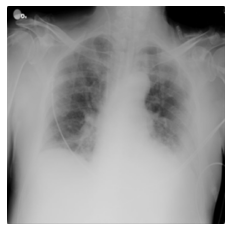

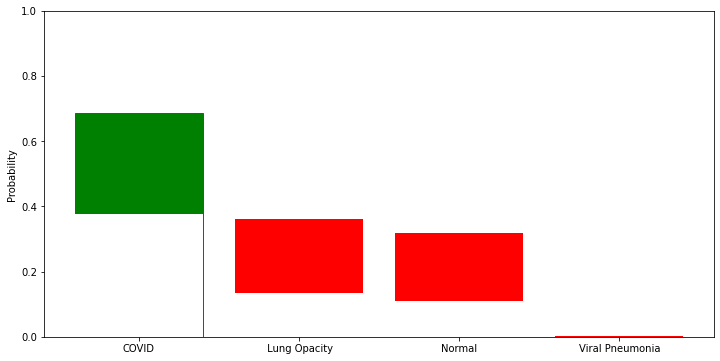

In [30]:
import_and_predict_bayes(image1_dir, label.index('COVID'))

##### Observe how the output of Bayesian CNN model is very different from the Standard CNN model. instead of giving us one put .  The Bayesian model gives an output with true labels and measurement of uncertainty. here it predicted the images belongs COVID with high probability of  0.76. However, this research observed that aleatroic and espistemic uncertainty exist when predicteing COVID image

In [21]:
image2_dir = os.path.join(test_dir+'Normal/Normal-1.png')

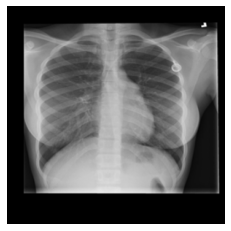

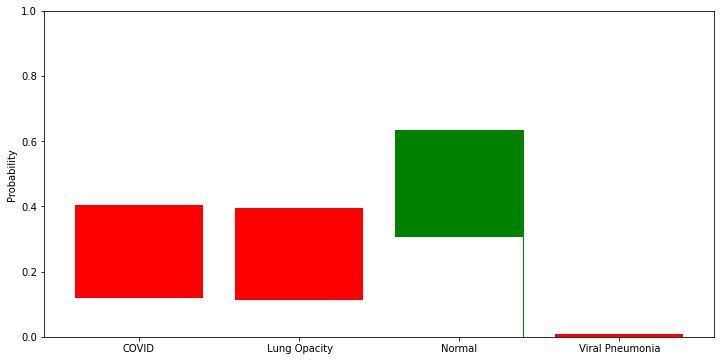

In [31]:
import_and_predict_bayes(image2_dir, label.index('Normal'))

### The bayesian model predicts that this image belongs to Normal class with probability of  0.77. However, again observations been made that there exist uncertainty, if you look at COVID class there's probability of 0.43 and Lun_opacity probability of 0.389. Remember in standard CNN model it predict the very same image belongs to Normal but the probability is almost similar to the one of COVID. This is where Bayesian CNN model comes and plays a role in measuring the uncertainty, now we are very certain that belongs to Normal class thanks to bayesian Model, and that way we are able to avoid confusions or even far worse situation like making assumption someone does not have coronavirus while that patient does. This issue does raise in real life time, hence the solution of Bayesian probabilistic classification .

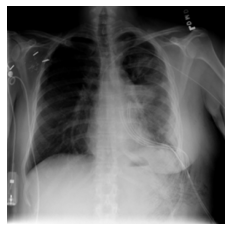

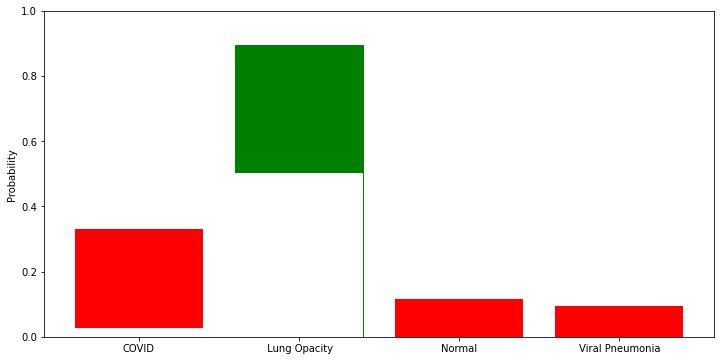

In [93]:
image7_dir = os.path.join(test_dir+'Lung_Opacity/Lung_Opacity-1.png')
import_and_predict_bayes(image7_dir,label.index('Lung_Opacity'))

#### Model predicted that this image belongs to Lung_Opacity with probability of 0.84, though there are some uncertainties but they are very low, this tells us that the  model is very confident in its prediction

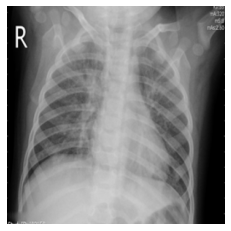

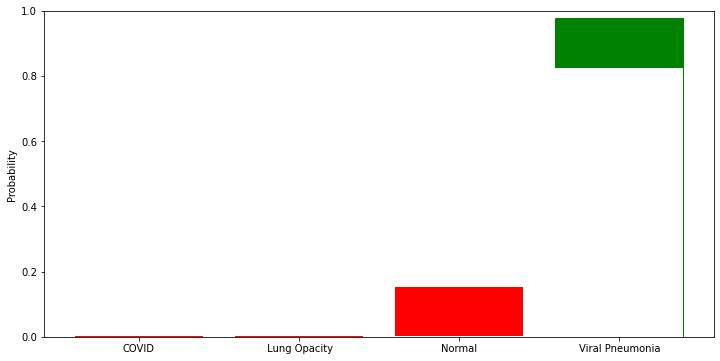

In [94]:
image8_dir = os.path.join(test_dir+'Viral Pneumonia/Viral Pneumonia-1.png')
import_and_predict_bayes(image8_dir,label.index('Viral Pneumonia'))

##### Lastly  the prediction of Viral Pneumonia with probability 0.988 value which is very good, however theres a little bit of uncertainty in the output which is around 0.111 but it is good. and other probabilities are assigned to the first two classes and they all sum upto 1.

# Important Notice
The model was assigned to predict COVID image 400 times instead of just
once. Of those 400 predictions, in one run the model may predict COVID
image with 0.4 probability and Lung Opacity or Viral Pneumonia with 0.6
Probability. In another run, it may predict COVID image with 0.9 probability and Normal with 0.1 probability.The variability of probability value is huge in Bayesian CNN model. The Model


### Conclusion

From all the ouputs ,This research can conclude based outputs that both models given us,
This research is able to tell that the Bayesian CNN model outperforms the standard
CNN model. Simply, because of the outputs instead of giving one output
of an image say it is coronavirus or any classifier it also gives us an output
of probability distribution to each of class so that we know which is which
and how confident is the model, and from each output we are able to reach
conclusion according to a class that has been assigned a high probability
value and also it measures the uncertainty. The nicest thing also it uses KL
divergence to calculate how close is p and q distributions